In [1]:
##GET FUNCTIONS REQUIRED TO SHOW ON WEBSITE
import portfolio
import dataAck
import pandas as pd

In [110]:
import importlib
importlib.reload(portfolio)

<module 'portfolio' from '/Users/patrickogrady/Documents/CODE/walkforwardTrader/portfolio.py'>

In [111]:
##GET ALL PORTFOLIOS
allPortfolios = portfolio.getPortfolios()
allPortfolios

[{'benchmark': 'VO',
  'description': 'VO 8-13-17',
  'key': '7d372f0c7053ce8035616e2ba82f33de0cfebccbd78e4e3798f0c18f'}]

In [112]:
## GET ALL MODELS IN PORTFOLIO
portfolioInfo = allPortfolios[0]
models = portfolio.getModelsByKey(portfolio.getPortfolioModels(portfolioInfo["key"]))
models

In [113]:
##DOWNLOAD REQUIRED DATA FOR TARGET TICKERS
tickersRequired = []
for mod in models:
    print(mod.describe())
    if mod.inputSeries.targetTicker not in tickersRequired:
        tickersRequired.append(mod.inputSeries.targetTicker)
    
pulledData, validTickers = dataAck.downloadTickerData(tickersRequired)

joinedData = dataAck.joinDatasets([pulledData[ticker] for ticker in pulledData])
joinedData

((10, ('SHY', 30, None, None), 3, 'VO'), 10, 25)
((10, ('SHY', 30, None, None), 2, 'VO'), 10, 25)
((10, ('TIP', 24, None, 15), 2, 'VO'), 10, 25)
((22, ('IWF', 4, None, None), 3, 'VO'), 22, 25)
((10, ('XLV', 31, None, 14), 2, 'VO'), 10, 50)


IndexError: list index out of range

# PORTFOLIO DATA

In [ ]:
##GENERATE RETURNS FOR PORTFOLIO
portfolioAllocations = portfolio.getPortfolioAllocations(portfolioInfo["key"])

In [ ]:
predsTable = pd.DataFrame([])
weightsTable = pd.DataFrame([])
tickerAllocationsTable = pd.DataFrame([])
scaledTickerAllocationsTable = pd.DataFrame([])
for allocation in portfolioAllocations:
    colsAlgo = []
    valsAlgo = []
    colsAlgoWeight = []
    valsAlgoWeight = []
    colsTicker = []
    valsTicker = []
    colsTickerScaled = []
    valsTickerScaled = []
    
    for key in allocation:
        if key.startswith("ticker_"):
            colsTicker.append(key[len("ticker_"):])
            valsTicker.append(allocation[key])
        if key.startswith("scaled_ticker_"):
            colsTickerScaled.append(key[len("scaled_ticker_"):])
            valsTickerScaled.append(allocation[key])
        if key.startswith("algo_") and not key.startswith("algo_weight_"):
            colsAlgo.append(key[len("algo_"):])
            valsAlgo.append(allocation[key])
        if key.startswith("algo_weight_"):
            colsAlgoWeight.append(key[len("algo_weight_"):])
            valsAlgoWeight.append(allocation[key])
        
    predsTable = pd.concat([predsTable, pd.DataFrame([valsAlgo], index = [allocation["predictionDay"]], columns=colsAlgo).tz_localize(None)])
    weightsTable = pd.concat([weightsTable, pd.DataFrame([valsAlgoWeight], index = [allocation["predictionDay"]], columns=colsAlgoWeight).tz_localize(None)])
    tickerAllocationsTable = pd.concat([tickerAllocationsTable, pd.DataFrame([valsTicker], index = [allocation["predictionDay"]], columns=colsTicker).tz_localize(None)])
    scaledTickerAllocationsTable = pd.concat([scaledTickerAllocationsTable, pd.DataFrame([valsTickerScaled], index = [allocation["predictionDay"]], columns=colsTickerScaled).tz_localize(None)])
predsTable = predsTable.sort_index()
weightsTable = weightsTable.sort_index()
tickerAllocationsTable = tickerAllocationsTable.sort_index()
scaledTickerAllocationsTable = scaledTickerAllocationsTable.sort_index()

In [114]:
predsTable

,0b84734d97e005d3a2a3a06d82cb793ec1f7557573e3bc032fb7fdf3,11912f289e86b30f1af1b7272e773732dd099e3069cdf79f1c2ba47e,2c69141675447782e2a74036a7cbd8fb5fc08476cebf557bd6e787a6,341fe3e8eb88c9fbdd779c6c8727762f99fc1043383dd8242da044e9,78afec28d6c4e55102b09d8b6b179a3508e2b03fb46d2e8858c14fdc
2006-12-07,-0.054173,0.000000,-0.059411,0.000000,0.137561
2006-12-08,-0.053505,0.000000,-0.056038,0.000000,0.000000
2006-12-11,-0.026538,-0.341410,0.000000,-0.075764,-0.132883
2006-12-12,0.000000,0.000000,0.056702,-0.077772,0.000000
2006-12-13,0.027001,0.000000,0.057234,0.000000,0.000000
2006-12-14,0.052971,0.341031,0.054121,0.077080,-0.066883
2006-12-15,0.040490,0.739604,0.075541,0.033932,-0.055217
2006-12-18,0.022910,0.694519,0.083827,0.000000,0.000000
2006-12-19,0.000000,0.694586,0.000000,-0.037422,0.138450
2006-12-20,0.000000,0.695747,-0.083442,0.000000,0.137897


In [115]:
weightsTable

,0b84734d97e005d3a2a3a06d82cb793ec1f7557573e3bc032fb7fdf3,11912f289e86b30f1af1b7272e773732dd099e3069cdf79f1c2ba47e,2c69141675447782e2a74036a7cbd8fb5fc08476cebf557bd6e787a6,341fe3e8eb88c9fbdd779c6c8727762f99fc1043383dd8242da044e9,78afec28d6c4e55102b09d8b6b179a3508e2b03fb46d2e8858c14fdc
2006-12-07,0.054173,0.667635,0.059411,0.081219,0.137561
2006-12-08,0.053505,0.678703,0.056038,0.077939,0.133814
2006-12-11,0.053076,0.682820,0.055456,0.075764,0.132883
2006-12-12,0.053796,0.678765,0.056702,0.077772,0.132964
2006-12-13,0.054002,0.677624,0.057234,0.077511,0.133628
2006-12-14,0.052971,0.682062,0.054121,0.077080,0.133767
2006-12-15,0.040490,0.739604,0.075541,0.033932,0.110433
2006-12-18,0.045820,0.694519,0.083827,0.037404,0.138431
2006-12-19,0.045816,0.694586,0.083726,0.037422,0.138450
2006-12-20,0.045666,0.695747,0.083442,0.037248,0.137897


In [116]:
tickerAllocationsTable

,VO
2006-12-07,0.023978
2006-12-08,-0.109544
2006-12-11,-0.576596
2006-12-12,-0.021069
2006-12-13,0.084236
2006-12-14,0.458319
2006-12-15,0.834350
2006-12-18,0.801255
2006-12-19,0.795615
2006-12-20,0.750203


In [117]:
scaledTickerAllocationsTable

,VO
2006-12-07,1.0
2006-12-08,-1.0
2006-12-11,-1.0
2006-12-12,-1.0
2006-12-13,1.0
2006-12-14,1.0
2006-12-15,1.0
2006-12-18,1.0
2006-12-19,1.0
2006-12-20,1.0


# DAILY PERFORMANCE

In [2]:
def calculatePerformanceForTable(table, tickerOrder, joinedData):
    aggregatePerformance = None
    for i in range(len(tickerOrder)):
        dailyFactorReturn = dataAck.getDailyFactorReturn(tickerOrder[i], joinedData)
        thisPerformance = table[[table.columns[i]]].join(dailyFactorReturn).apply(lambda x:x[0] * x[1], axis=1)
        thisPerformance = pd.DataFrame(thisPerformance, columns=[table.columns[i]])
        if aggregatePerformance is None:
            aggregatePerformance = thisPerformance
        else:
            aggregatePerformance = aggregatePerformance.join(thisPerformance)
    return aggregatePerformance.dropna()

In [119]:
tickerPerformance = calculatePerformanceForTable(tickerAllocationsTable, tickerAllocationsTable.columns, joinedData)

In [120]:
algoPerformance = pd.DataFrame(tickerPerformance.apply(lambda x:sum(x), axis=1), columns=["Algo Return"])

In [121]:
factorReturn = dataAck.getDailyFactorReturn("VO", joinedData)
factorReturn.columns = ["Factor Return (" + "VO" + ")"]
algoVsBenchmark = algoPerformance.join(factorReturn).dropna()

In [122]:
scaledTickerPerformance = calculatePerformanceForTable(scaledTickerAllocationsTable, scaledTickerAllocationsTable.columns, joinedData)

In [123]:
##ALGO PERFORMANCE

##FORM HASH TO TICKER
hashToTicker = {}
for model in models:
    hashToTicker[portfolio.getModelHash(model)] = model.inputSeries.targetTicker

individualAlgoPerformance = calculatePerformanceForTable(predsTable,[hashToTicker[modelHash] for modelHash in predsTable.columns], joinedData)

# PERFORMANCE METRICS

In [3]:
import empyrical

In [125]:
empyrical.sharpe_ratio(algoPerformance)

0.58507687614650572

In [126]:
empyrical.alpha_beta(algoPerformance, factorReturn)

(0.030044301900176044, 0.21522171535136397)

In [127]:
empyrical.alpha_beta(algoPerformance[-100:], factorReturn[-100:])

(0.004720194534390166, 0.26746245787802275)

In [128]:
empyrical.annual_return(algoPerformance)[0]

0.050034577062711527

In [129]:
empyrical.annual_volatility(algoPerformance)

0.09045730600281472

In [130]:
empyrical.sharpe_ratio(algoPerformance[-100:])

1.5579385336364719

In [131]:
empyrical.cum_returns(algoPerformance[-100:]).values[-1][0]

0.018121370205134157

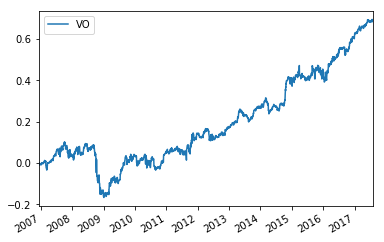

In [132]:
%matplotlib inline
empyrical.cum_returns(tickerPerformance).plot()

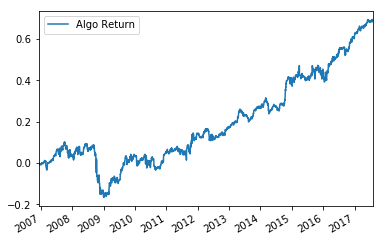

In [133]:
%matplotlib inline
empyrical.cum_returns(algoPerformance).plot()

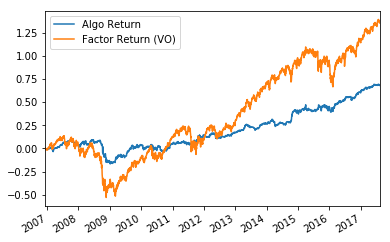

In [134]:
%matplotlib inline
empyrical.cum_returns(algoVsBenchmark).plot()

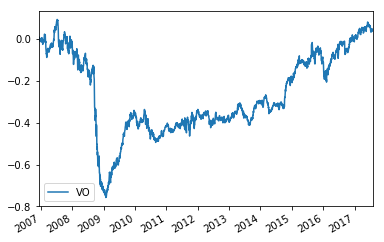

In [135]:
%matplotlib inline
empyrical.cum_returns(scaledTickerPerformance).plot()

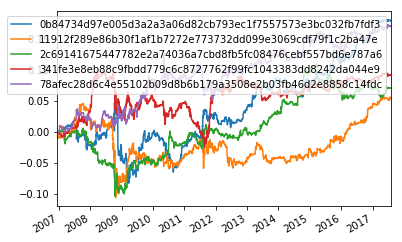

In [136]:
%matplotlib inline
empyrical.cum_returns(individualAlgoPerformance).plot()

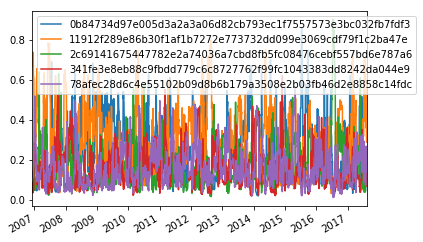

In [137]:
%matplotlib inline
weightsTable.plot()

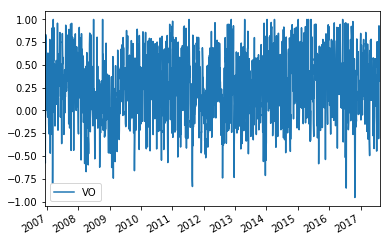

In [138]:
%matplotlib inline
tickerAllocationsTable.plot()

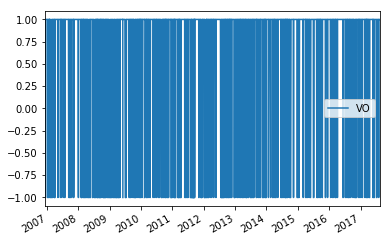

In [139]:
%matplotlib inline
scaledTickerAllocationsTable.plot()

# CONVERSION

In [4]:
import time
def convertTableToJSON(table):
    allArrs = []
    for i in range(len(table.index)):
        thisArr = []
        timestamp = int(time.mktime(table.index[i].timetuple())) * 1000
        thisArr.append(timestamp)
        for j in range(len(table.columns)):
            thisArr.append(table.iloc[i][j])
        allArrs.append(thisArr)
    return table.columns.values.tolist(), allArrs

In [5]:
#convertTableToJSON(algoPerformance)

# CODE FOR SITE

In [6]:
import portfolio
import dataAck
import pandas as pd
import numpy as np
import json
def getDataForPortfolio(portfolioKey):
    models = portfolio.getModelsByKey(portfolio.getPortfolioModels(portfolioKey))
    ##DOWNLOAD REQUIRED DATA FOR TARGET TICKERS
    tickersRequired = []
    for mod in models:
        print(mod.describe())
        if mod.inputSeries.targetTicker not in tickersRequired:
            tickersRequired.append(mod.inputSeries.targetTicker)
    pulledData, validTickers = dataAck.downloadTickerData(tickersRequired)
    joinedData = dataAck.joinDatasets([pulledData[ticker] for ticker in pulledData])
    ##GENERATE RETURNS FOR PORTFOLIO
    portfolioAllocations = portfolio.getPortfolioAllocations(portfolioKey)
    
    predsTable = pd.DataFrame([])
    weightsTable = pd.DataFrame([])
    tickerAllocationsTable = pd.DataFrame([])
    scaledTickerAllocationsTable = pd.DataFrame([])
    for allocation in portfolioAllocations:
        colsAlgo = []
        valsAlgo = []
        colsAlgoWeight = []
        valsAlgoWeight = []
        colsTicker = []
        valsTicker = []
        colsTickerScaled = []
        valsTickerScaled = []

        for key in allocation:
            if key.startswith("ticker_"):
                colsTicker.append(key[len("ticker_"):])
                valsTicker.append(allocation[key])
            if key.startswith("scaled_ticker_"):
                colsTickerScaled.append(key[len("scaled_ticker_"):])
                valsTickerScaled.append(abs(allocation[key]) if np.isnan(allocation[key]) == False else 0.0)
            if key.startswith("algo_") and not key.startswith("algo_weight_"):
                colsAlgo.append(key[len("algo_"):])
                valsAlgo.append(allocation[key])
            if key.startswith("algo_weight_"):
                colsAlgoWeight.append(key[len("algo_weight_"):])
                valsAlgoWeight.append(allocation[key])

        predsTable = pd.concat([predsTable, pd.DataFrame([valsAlgo], index = [allocation["predictionDay"]], columns=colsAlgo).tz_localize(None)])
        weightsTable = pd.concat([weightsTable, pd.DataFrame([valsAlgoWeight], index = [allocation["predictionDay"]], columns=colsAlgoWeight).tz_localize(None)])
        tickerAllocationsTable = pd.concat([tickerAllocationsTable, pd.DataFrame([valsTicker], index = [allocation["predictionDay"]], columns=colsTicker).tz_localize(None)])
        scaledTickerAllocationsTable = pd.concat([scaledTickerAllocationsTable, pd.DataFrame([valsTickerScaled], index = [allocation["predictionDay"]], columns=colsTickerScaled).tz_localize(None)])
    
    predsTable = predsTable.sort_index()
    weightsTable = weightsTable.sort_index()
    tickerAllocationsTable = tickerAllocationsTable.sort_index()
    scaledTickerAllocationsTable = scaledTickerAllocationsTable.sort_index()
    
    tickerPerformance = calculatePerformanceForTable(tickerAllocationsTable, tickerAllocationsTable.columns, joinedData)
    
    algoPerformance = pd.DataFrame(tickerPerformance.apply(lambda x:sum(x), axis=1), columns=["Algo Return"])
    
    
    benchmark = portfolio.getPortfolioByKey(portfolioKey)["benchmark"]
    factorReturn = dataAck.getDailyFactorReturn(benchmark, joinedData)
    factorReturn.columns = ["Factor Return (" + benchmark + ")"]
    algoVsBenchmark = algoPerformance.join(factorReturn).dropna()
    
    ##FORM HASH TO TICKER
    hashToTicker = {}
    for model in models:
        hashToTicker[portfolio.getModelHash(model)] = model.inputSeries.targetTicker

    individualAlgoPerformance = calculatePerformanceForTable(predsTable,[hashToTicker[modelHash] for modelHash in predsTable.columns], joinedData)
    
    ##CONVERT TO USABLE OBJECTS
    tickerCols, tickerRows = convertTableToJSON(empyrical.cum_returns(tickerPerformance))
    algoCols, algoRows = convertTableToJSON(empyrical.cum_returns(algoPerformance))
    algoVsBenchmarkCols, algoVsBenchmarkRows = convertTableToJSON(empyrical.cum_returns(algoVsBenchmark))
    individualAlgoPerformanceCols, individualAlgoPerformanceRows = convertTableToJSON(empyrical.cum_returns(individualAlgoPerformance))
    scaledAllocationCols, scaledAllocationRows = convertTableToJSON(scaledTickerAllocationsTable)
    weightsCols, weightsRows = convertTableToJSON(weightsTable)
    alpha, beta = empyrical.alpha_beta(algoPerformance, factorReturn)
    recentAlpha, recentBeta = empyrical.alpha_beta(algoPerformance[-100:], factorReturn[-100:])
    recentSharpe = empyrical.sharpe_ratio(algoPerformance[-100:])
    recentReturn = empyrical.cum_returns(algoPerformance[-100:]).values[-1][0]
    algoVsBenchmarkColsRecent, algoVsBenchmarkRowsRecent = convertTableToJSON(empyrical.cum_returns(algoVsBenchmark[-100:]))
    return {
        "tickerCols":json.dumps(tickerCols),
        "tickerRows":json.dumps(tickerRows),
        "algoCols":json.dumps(algoCols),
        "algoRows":json.dumps(algoRows),
        "tickerCols":json.dumps(tickerCols),
        "tickerRows":json.dumps(tickerRows),
        "algoVsBenchmarkCols":json.dumps(algoVsBenchmarkCols),
        "algoVsBenchmarkRows":json.dumps(algoVsBenchmarkRows),
        "individualAlgoPerformanceCols":json.dumps(individualAlgoPerformanceCols),
        "individualAlgoPerformanceRows":json.dumps(individualAlgoPerformanceRows),
        "scaledAllocationCols":json.dumps(scaledAllocationCols),
        "scaledAllocationRows":json.dumps(scaledAllocationRows),
        "weightsCols":json.dumps(weightsCols),
        "weightsRows":json.dumps(weightsRows),
        "algoSharpe":empyrical.sharpe_ratio(algoPerformance),
        "alpha":alpha,
        "beta":beta,
        "annualReturn":empyrical.annual_return(algoPerformance)[0],
        "annualVolatility":empyrical.annual_volatility(algoPerformance),
        "recentSharpe":recentSharpe,
        "recentReturn":recentReturn,
        "recentAlpha":recentAlpha,
        "recentBeta":recentBeta,
        "algoVsBenchmarkColsRecent":json.dumps(algoVsBenchmarkColsRecent),
        "algoVsBenchmarkRowsRecent":json.dumps(algoVsBenchmarkRowsRecent),
    }


In [7]:
portfolioInfo

NameError: name 'portfolioInfo' is not defined

In [8]:
import importlib
import params
importlib.reload(params)

<module 'params' from '/home/prohb125/walkforwardTrader/params.py'>

In [9]:
import pickle
from google.cloud import datastore, storage, logging
def cachePortfolio(portfolioInfo, portfolioData):
    portfolioHash = portfolioInfo["key"]
    storageClient = storage.Client('money-maker-1236')
    while True:
        try:
            bucket = storageClient.get_bucket(params.portfolioDataCache)
            blob = storage.Blob(portfolioHash, bucket)
            blob.upload_from_string(pickle.dumps(portfolioData))
            break
        except:
            print("UPLOAD BLOB ERROR:", str(sys.exc_info()))
            time.sleep(10)
    ##CACHE STATS
    while True:
        try:
            datastoreClient = datastore.Client('money-maker-1236')
            toUpload = {
                "benchmark":portfolioInfo["benchmark"],
                "description":portfolioInfo["description"]
            }
            for item in ["algoSharpe",
                "alpha",
                "beta",
                "annualReturn",
                "annualVolatility",
                "recentSharpe",
                "recentReturn",
                "recentAlpha",
                "recentBeta"]:
                toUpload[item] = portfolioData[item]
            key = datastoreClient.key(params.portfolioQuickCache, portfolioHash) #NEED TO HASH TO ENSURE NON-OVERLAPPING PREDICTIONS
            organismToStore = datastore.Entity(key=key)
            organismToStore.update(toUpload)
            datastoreClient.put(organismToStore)
            break
        except:
            print("UPLOAD ERROR:", str(sys.exc_info()))
            time.sleep(10)
    pass

def fetchPortfolio(portfolioHash):
    storageClient = storage.Client('money-maker-1236')
    failures = 0
    while True:
        try:
            bucket = storageClient.get_bucket(params.portfolioDataCache)
            blob = storage.Blob(portfolioHash, bucket)
            return pickle.loads(blob.download_as_string())
            break
        except:
            print("DOWNLOAD BLOB ERROR:", str(sys.exc_info()))
            failures += 1
            if failures > 5:
                return None
            # time.sleep(10)
    pass
def fetchQuickPortfolios():
    while True:
        try:
            datastore_client = datastore.Client('money-maker-1236')
            query = datastore_client.query(kind=params.portfolioQuickCache)
            retrievedPortfolios = [{
                "key":item.key.name,
                "description":item["description"],
                "benchmark":item["benchmark"],
                "algoSharpe":item["algoSharpe"],
                "alpha":item["alpha"] * 100,
                "beta":item["beta"],
                "annualReturn":item["annualReturn"] * 100,
                "annualVolatility":item["annualVolatility"] * 100,
                "recentSharpe":item["recentSharpe"],
                "recentReturn":item["recentReturn"] * 100,
                "recentAlpha":item["recentAlpha"] * 100,
                "recentBeta":item["recentBeta"]
            } for item in list(query.fetch())]

            return retrievedPortfolios
        except:
            time.sleep(10)
            print("DATA SOURCE RETRIEVAL ERROR:", str(sys.exc_info()))
            
def fetchPortfolioInfo(portfolioHash):
    while True:
        try:
            datastore_client = datastore.Client('money-maker-1236')
            key = datastore_client.key(params.portfolioQuickCache, portfolioHash)
            item = datastore_client.get(key)
            retrievedPortfolio = {
                "key":item.key.name,
                "description":item["description"],
                "benchmark":item["benchmark"],
                "algoSharpe":item["algoSharpe"],
                "alpha":item["alpha"] * 100,
                "beta":item["beta"],
                "annualReturn":item["annualReturn"] * 100,
                "annualVolatility":item["annualVolatility"] * 100,
                "recentSharpe":item["recentSharpe"],
                "recentReturn":item["recentReturn"] * 100,
                "recentAlpha":item["recentAlpha"] * 100,
                "recentBeta":item["recentBeta"]
            }

            return retrievedPortfolio
        except:
            time.sleep(10)
            print("DATA SOURCE RETRIEVAL ERROR:", str(sys.exc_info()))

In [10]:
allPortfolios = portfolio.getPortfolios()
for portfolioInfo in allPortfolios:
    print(portfolioInfo)
    portfolioData = getDataForPortfolio(portfolioInfo["key"])
    cachePortfolio(portfolioInfo, portfolioData)
    

{'key': '5522786eb28943c781c8bf62503848a2bdf51ba50e612fd13c5a3f9f', 'description': 'Just trade underlying', 'benchmark': 'EWZ'}
((22, ('GDX', 32, None, None), 3, 'EWZ'), 22, 100)
((10, ('GDX', 32, None, None), 3, 'EWZ'), 10, 50)
EWZ
{'key': '7d372f0c7053ce8035616e2ba82f33de0cfebccbd78e4e3798f0c18f', 'description': 'VO 8-13-17', 'benchmark': 'VO'}
((10, ('XLV', 31, None, 14), 2, 'VO'), 10, 50)
((22, ('IWF', 4, None, None), 3, 'VO'), 22, 25)
((10, ('SHY', 30, None, None), 2, 'VO'), 10, 25)
((10, ('TIP', 24, None, 15), 2, 'VO'), 10, 25)
((10, ('SHY', 30, None, None), 3, 'VO'), 10, 25)
VO


In [69]:
fetchPortfolio('7d372f0c7053ce8035616e2ba82f33de0cfebccbd78e4e3798f0c18f')

{'algoCols': '["Algo Return"]',
 'algoRows': '[[1165478400000, 3.9769688994661934e-05], [1165564800000, 0.0002046772176600431], [1165824000000, 0.0016827618295494062], [1165910400000, 0.0016731919182739752], [1165996800000, 0.0021193585276670923], [1166083200000, 0.0011530128958672226], [1166169600000, -0.004633789302183389], [1166428800000, -0.004029040684660035], [1166515200000, -0.0037888801734057287], [1166601600000, -0.008204430899778181], [1166688000000, -0.009676909045355564], [1166774400000, -0.00806220452194506], [1167120000000, -0.004784625227166273], [1167206400000, -0.005805547525874033], [1167292800000, -0.006052146381236079], [1167379200000, -0.006054326896525408], [1167811200000, -0.006134350694641633], [1167897600000, -0.007944241105916072], [1167984000000, -0.007953826216075432], [1168243200000, -0.008153494792002336], [1168329600000, -0.005547294424574134], [1168416000000, -0.002260775576188645], [1168502400000, 0.0018275027675538347], [1168588800000, 0.00172855175019

In [100]:
fetchQuickPortfolios()

[{'algoSharpe': 0.5850768761465057,
  'alpha': 3.0044301900176045,
  'annualReturn': 5.003457706271153,
  'annualVolatility': 9.045730600281471,
  'benchmark': 'VO',
  'beta': 0.21522171535136397,
  'description': 'VO 8-13-17',
  'key': '7d372f0c7053ce8035616e2ba82f33de0cfebccbd78e4e3798f0c18f',
  'recentAlpha': 0.47201945343901663,
  'recentBeta': 0.26746245787802275,
  'recentReturn': 1.8121370205134157,
  'recentSharpe': 1.557938533636472}]

In [104]:
fetchPortfolioInfo('7d372f0c7053ce8035616e2ba82f33de0cfebccbd78e4e3798f0c18f')

{'algoSharpe': 0.5850768761465057,
 'alpha': 3.0044301900176045,
 'annualReturn': 5.003457706271153,
 'annualVolatility': 9.045730600281471,
 'benchmark': 'VO',
 'beta': 0.21522171535136397,
 'description': 'VO 8-13-17',
 'key': '7d372f0c7053ce8035616e2ba82f33de0cfebccbd78e4e3798f0c18f',
 'recentAlpha': 0.47201945343901663,
 'recentBeta': 0.26746245787802275,
 'recentReturn': 1.8121370205134157,
 'recentSharpe': 1.557938533636472}